In [34]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import pandas

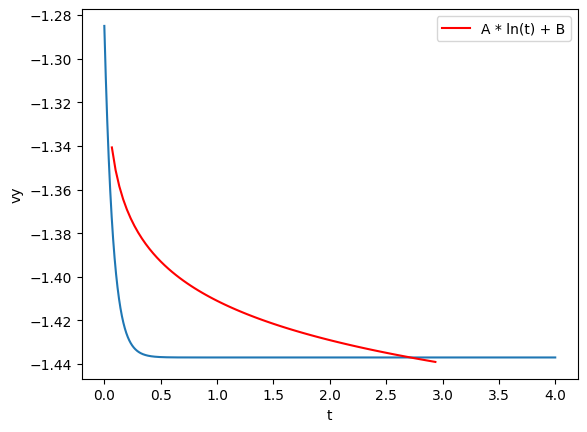

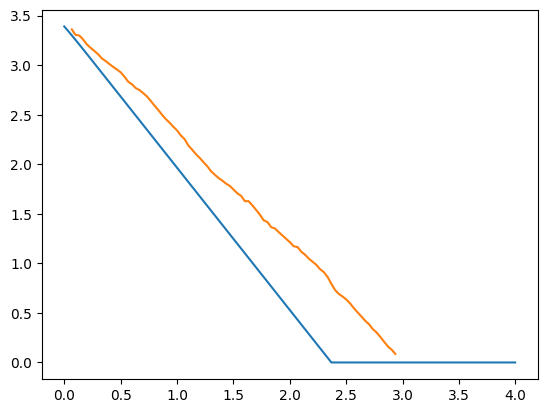

In [35]:
cd = 1.5
par = 1.1839 #densidade do ar p/ 20°C, em kg/m3
r = (35/2) * 10**(-2) #raio do paraquedas aberto, em metros
A = pi * r **2 # em metros
g = 9.8 #m/s2
m = 0.018 # kg

def modelo(X,t):
    y = X[0]
    vy = X[1]

    drag = (cd * par * vy**2 * A)/2
    peso = m * g

    dydt = vy
    dvydt = (drag/m) - (peso/m)

    if y <= 0:
        dydt = 0
        dvydt = 0

    dydt = [dydt, dvydt]
    return dydt

y0 = 3.391
vy0 = -1.285 #momento em que o paraquedas é aberto totalmente
ci = [y0, vy0]

tempo = np.arange(0,4 ,1e-3)
mod = odeint(modelo, ci, tempo)
listay = mod[:,0]
listavy = mod[:,1]

# plt.plot(tempo,listay)
plt.plot(tempo,listavy)

colunas = ['t', 'y', 'vy']
data = pandas.read_csv('novosdados.csv',names=colunas)


data = data.dropna() # tira dados vazios da lista
te = data.t.tolist() #transforma o data em uma lista tempo experimental
ye = data.y.tolist() #transforma o data em uma lista posicao ye experimental
vye = data.vy.tolist() #transforma o data em uma lista posicao vye experimental

#gerado a partir de linha de tendência logarítimica descoberta no tracker
A = 2.601E-2
B = 1.411E0

#correção logarítimica
vy_calculado = -1 * (A * np.log(te) + B)

# plt.scatter(te, vye, label='Dados reais') 
plt.plot(te, vy_calculado, label='A * ln(t) + B', color='red')
plt.xlabel('t')
plt.ylabel('vy')
plt.legend()
plt.show()

plt.plot(tempo,listay)
plt.plot(te,ye)


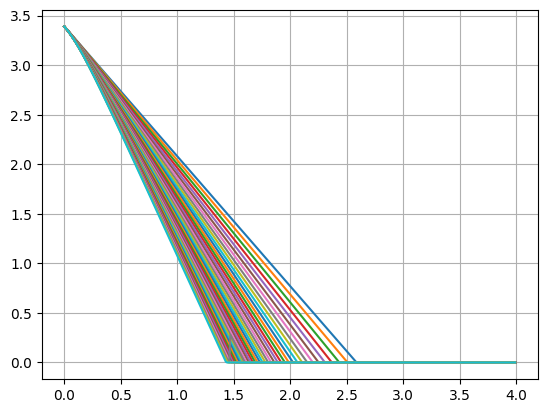

In [73]:
def cheguei(lis):
    i=0
    cheguei=False
    if cheguei ==False:
         if i < len (lis):
            if lis[i]==0:
                cheguei=True
            else:
                i+=1
         cheguei=True
    resposta=tempo1[i-1]
    return resposta

cd = 1.5
par = 1.1839 #densidade do ar p/ 20°C, em kg/m3
r = (35/2) * 10**(-2) #raio do paraquedas aberto, em metros
A = pi * r **2 # em metros
g = 9.8 #m/s2
m_lista = np.arange(0.015,0.055,0.001) # kg

def modelo1(X,t,massa):
    y = X[0]
    vy = X[1]

    drag = (cd * par * vy**2 * A)/2
    peso = massa * g

    dydt = vy
    dvydt = (drag/massa) - (peso/massa)

    if y <= 0:
        dydt = 0
        dvydt = 0

    dydt = [dydt, dvydt]
    return dydt

y0 = 3.391
vy0 = -1.285 #momento em que o paraquedas é aberto totalmente
ci = [y0, vy0]


lista_con=[]

tempo1 = np.arange(0,4 ,1e-2)
for i in m_lista:
    massa=i
    mod = odeint(modelo1, ci, tempo1, args=(massa,))
    listay = mod[:,0]
    lista_con.append(cheguei(listay))
    listavy = mod[:,1]
    plt.plot(tempo1,listay)

plt.grid()
plt.show()



ValueError: x and y must have same first dimension, but have shapes (400,) and (40,)

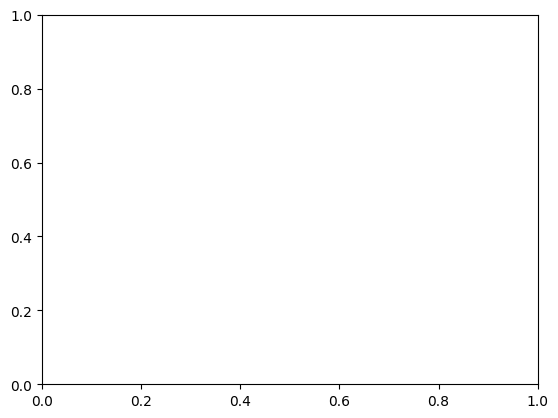

In [74]:
plt.plot(listay,lista_con)
plt.grid()
plt.show()
